#### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### In this scenario, we're going to classify the customers of a Telecommunications company using the k-Nearest Neighbors approach.
#### The dataset includes 1000 customers with various demographic info.
#### Our aim is to decide the most convenient service for the new customers of the company.
####   
#### The service categories are given as follows:

#### 1) Basic Service 
#### 2) Electronic Service (E-Service)
#### 3) Plus Service
#### 4) Full Service Package

#### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### First let's import the required libraries

In [1]:
import pandas as pd # To be able to handle data with ease (by employing dataframe structure)
import numpy as np # To be able to treat the data as vectors

import itertools
import matplotlib.pyplot as plt # To visualize the data and model
# So that we can draw plots on top of another
%matplotlib inline 
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker

from sklearn import preprocessing # For normalizing the data
from sklearn.model_selection import train_test_split # For splitting data into train & test clusters
from sklearn import metrics # For accuracy evaluation

from sklearn.neighbors import KNeighborsClassifier # To be able to user kNN algorithm on the dataset

### Importing the data from the Internet

In [2]:
!wget -O TelCoCustList.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv

--2020-05-03 10:38:08--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37048 (36K) [text/csv]
Saving to: ‘TelCoCustList.csv’

100%[======================================>] 37,048      --.-K/s   in 0.09s   

2020-05-03 10:38:09 (423 KB/s) - ‘TelCoCustList.csv’ saved [37048/37048]



In [3]:
df = pd.read_csv('TelCoCustList.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


### Data Preprocessing

#### To be able to use sci-kit learn library, we have to convert dataframes into numpy arrays

In [4]:
x = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']] .values  #.astype(float)
y = df['custcat'].values #.astype(float)

#### It is especially a good practice for kNN algorithms to have the data standardized by giving them zero-mean and unit variance

In [5]:
x = preprocessing.StandardScaler().fit(x).transform(x.astype(float))

### Splitting our dataset into Train / Test


In [6]:
xTrain, xTest, yTrain, yTest = train_test_split( x, y, test_size=0.2, random_state=4)
print ('Train set:', xTrain.shape,  yTrain.shape)
print ('Test set:', xTest.shape,  yTest.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


### Classification

#### We start with an initial guess for k. So, let's start with k=4

In [7]:
k = 4
kNNModel = KNeighborsClassifier(n_neighbors = k).fit(xTrain,yTrain)

In [8]:
yHat = kNNModel.predict(xTest)
print(yHat[0:5])
print(yTest[0:5])

[1 1 3 2 4]
[4 1 1 2 4]


### Evaluation

In [9]:
print("Train set Accuracy: ", metrics.accuracy_score(yTrain, kNNModel.predict(xTrain)))
print("Test set Accuracy: ", metrics.accuracy_score(yTest, yHat))

Train set Accuracy:  0.5475
Test set Accuracy:  0.32


### Now what about the other k values ?

#### Let's create an array for accuracy, in which we calculate accuracy for k values starting from 1 to 20

In [12]:
Ks = 20
meanAcc = np.zeros((Ks-1))
stdAcc = np.zeros((Ks-1))
confustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(xTrain,yTrain)
    yHat=neigh.predict(xTest)
    meanAcc[n-1] = metrics.accuracy_score(yTest, yHat)

    
    stdAcc[n-1]=np.std(yHat==yTest)/np.sqrt(yHat.shape[0])

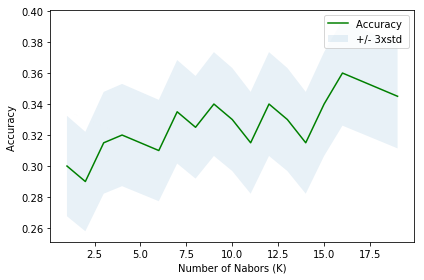

In [16]:
plt.plot(range(1,Ks),meanAcc,'g')
plt.fill_between(range(1,Ks),meanAcc - 1 * stdAcc,meanAcc + 1 * stdAcc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [17]:
print( "We obtained the best accuracy with k =", meanAcc.argmax()+1, "Neighbors.") 

We obtained the best accuracy with k = 16 Neighbors.
